### Importing modules

In [45]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd
# Import libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats 
from scipy.stats import norm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

### Problem Statement
**A physiotherapist with a male football team is interested in studying the relationship between foot injuries and the positions at which the players play from the data collected.**

#### 1.1 What is the probability that a randomly chosen player would suffer an injury?

In [46]:
players_injured=145
total_players=235
p=(players_injured/total_players)
print('The probability of an Event that a randomly chosen played would suffer injury will be  %',p)

The probability of an Event that a randomly chosen played would suffer injury will be  % 0.6170212765957447


#### 1.2 What is the probability that a player is a forward or a winger?

In [47]:
total_forward=94
total_winger=29
n=235
p=(total_forward+total_winger)/n
print('The probability that a randomly chosen player is a forward or a winger is %',p)

The probability that a randomly chosen player is a forward or a winger is % 0.5234042553191489


#### 1.3 What is the probability that a randomly chosen player plays in a striker position and has a foot injury?

In [48]:
players_striker = 45
total_players_striker = 77
p=(players_striker/total_players_striker)
print('Probability that a randomly chosen player plays in a striker position and has a foot injury is %',p)

Probability that a randomly chosen player plays in a striker position and has a foot injury is % 0.5844155844155844


#### 1.4 What is the probability that a randomly chosen injured player is a striker?

In [49]:
players_striker=45
total_injured_striker_players=145
p=(players_striker/total_injured_striker_players)
print('probability that a randomly chosen injured player is %',p)

probability that a randomly chosen injured player is % 0.3103448275862069


# Problem 2
**The breaking strength of gunny bags used for packaging cement is normally distributed with a mean of 5 kg per sq. centimeter and a standard deviation of 1.5 kg per sq. centimeter. The quality team of the cement company wants to know the following about the packaging material to better understand wastage or pilferage within the supply chain; Answer the questions below based on the given information;**

### 2.1 What proportion of the gunny bags have a breaking strength of less than 3.17 kg per sq cm?

In [50]:
mu=5
sigma=1.5
x=np.arange(0,10,0.1)

0.1112 %


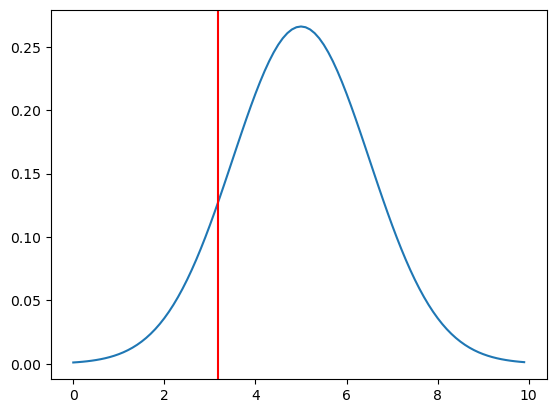

In [95]:
mean=mu
sd=sigma
prob=norm.cdf(3.17, loc=mu, scale=sd)
print((round(prob,4)),"%")
plt.plot(x, norm.pdf(x, mean, sd))
plt.axvline(x=3.17, c="r")
plt.show()

### observation:
- The cumulative Distribution Area under the Red Region is0.111.Hence, the cumulative probability is 11.1%
- From the above plot, we need to find out the probability or area under the shaded region for the given question that proportion less than 3.17 kg per sq cm

### 2.2 What proportion of the gunny bags have a breaking strength at least 3.6 kg per sq cm.?

0.8247 %


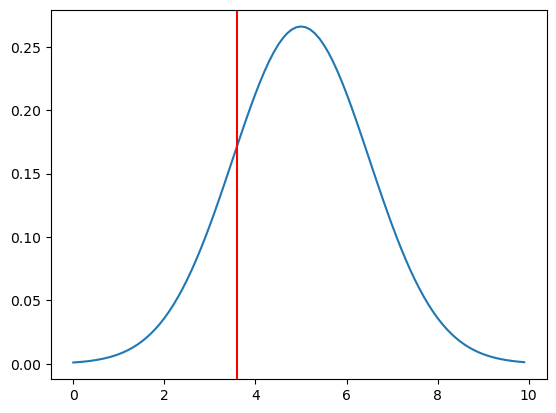

In [52]:
prob=1-norm.cdf(3.6,loc=mu,scale=sd)
print((round(prob,4)),"%")
plt.plot(x,norm.pdf(x,mean,sd))
plt.axvline(x=3.6,c="r")
plt.show()

### Observation:
Thus we conclude that the82.46% of gunny bags have the breaking strength at least 3.6 kg/sq.cm

### 2.3 What proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm.?

0.1306 %


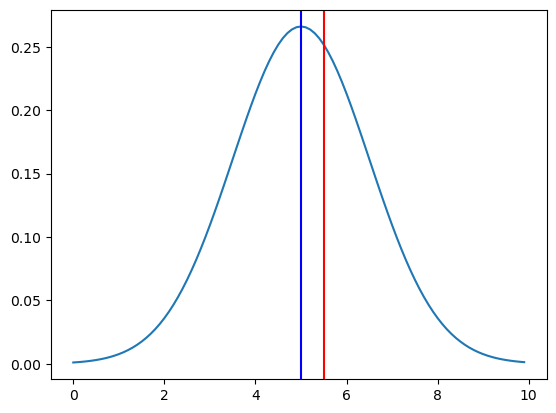

In [53]:
prob=norm.cdf(5.5,loc=mu,scale=sd)-stats.norm.cdf(5,loc=mu,scale=sd)
print((round(prob,4)),"%")
plt.plot(x,norm.pdf(x,mean,sd))
plt.axvline(x=5.5,c="r")
plt.axvline(x=5,c="b")
plt.show()

### observation:
Thus we conclude that 13.06% of gunny bags have breaking strength between 5 and 5.5kg/sq.cm.

### 2.4 What proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm.?

0.139 %


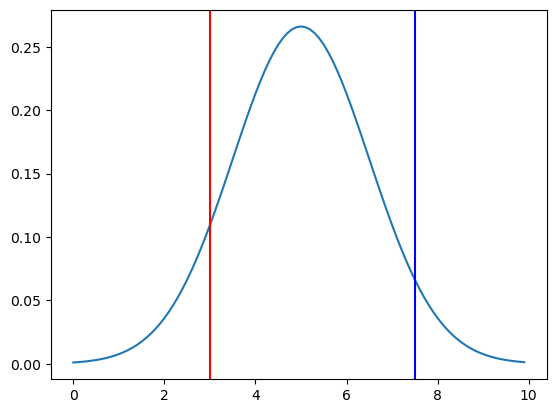

In [54]:
Prob=1-(stats.norm.cdf(7.5,loc=mu,scale=sigma)-stats.norm.cdf(3,loc=mu,scale=sigma))
print((round(Prob,4)),"%")
plt.plot(x, norm.pdf(x, mean, sd))
plt.axvline(x=3, c="r")
plt.axvline(x=7.5, c="b")
plt.show()

### observation:
thus we conclude thatthe proportion of gunny bags having strength not between 3 and 7.5 per sqcm is 13.9%

## Problem 3
Zingaro stone printing is a company that specializes in printing images or patterns on polished or unpolished stones. However, for the optimum level of printing of the image, the stone surface has to have a Brinell's hardness index of at least 150. Recently, Zingaro has received a batch of polished and unpolished stones from its clients. Use the data provided to answer the following (assuming a 5% significance level);

### Loading the dataset

In [55]:
df=pd.read_csv("Zingaro_Company.csv")

### checking the shape of the dataset

In [56]:
df.shape

(75, 2)

### Checking the data types of the columns for the dataset

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unpolished            75 non-null     float64
 1   Treated and Polished  75 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


### Getting the statistical summary for the numerical variables

In [58]:
df.describe()

,Unpolished,Treated and Polished
count,75.000000,75.000000
mean,134.110527,147.788117
std,33.041804,15.587355
min,48.406838,107.524167
25%,115.329753,138.268300
50%,135.597121,145.721322
75%,158.215098,157.373318
max,200.161313,192.272856


### check the missing value

In [59]:
df.isnull().sum()

Unpolished              0
Treated and Polished    0
dtype: int64

### Check for duplicates

In [60]:
df.duplicated().sum()

0

### 3.1 Zingaro has reason to believe that the unpolished stones may not be suitable for printing. Do you think Zingaro is justified in thinking so?

### Define the null and alternate hypotheses:-
- (Null Hypothesis)H0 - Hardness index of unpolished stones >150
- (Alternative Hypothesis)H1 - Hardness index of unpolished stones < 150

### Identify the test statistic
- Population standard deviation is not known

- The observations in one sample should be independent of the observations in the other sample.

- Data from each of the 2 groups following a normal distribution

**Therefore, we will use T Test to compute p-value**

### Decide the significance level
As given in the problem statement, we select  𝛼=0.05

### Calculate the p_value

In [61]:
from scipy.stats import ttest_1samp
t_statistic,p_value=stats.ttest_1samp(df['Unpolished '],150,alternative='less')
print('t_test',t_statistic)
print('p-value',p_value)

t_test -4.164629601426757
p-value 4.171286997419652e-05


### compare the p value  𝛼=0.05

In [62]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 4.171286997419652e-05 is less than the level of significance, we reject the null hypothesis.


### Conclusion:
The p_value is greater then alpha 

null hypothesis should be rejected and the alternative hypothesis should be accepted.

So, Zingaro is justified in thinking that unpolished stone is not suitable for printing.

### 3.2 Is the mean hardness of the polished and unpolished stones the same?

### Define the null and alternate hypotheses:
(H0): The mean hardness of polished stones (µp) is equal to the mean hardness of unpolished stones (µu).

(H1): The mean hardness of polished stones (µp) is not equal to the mean hardness of unpolished stones (µu).

### Decide the significance level
As given in the problem statement, we select  𝛼=0.05

#### Calculate the p_value

In [63]:
from scipy.stats import ttest_ind
t_statistic, p_value  = ttest_ind(df['Unpolished '],df['Treated and Polished'])
print('tstat',t_statistic)    
print('P Value',p_value)  

tstat -3.2422320501414053
P Value 0.0014655150194628353


In [64]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0014655150194628353 is less than the level of significance, we reject the null hypothesis.


### conclusion:
The probability value (0.001) of the above sample t test is less than the level of significance (0.05). Therefore,that the mean of Brinell's harness index of the polished & unpolished stones are not same

## Problem 4
Dental implant data: The hardness of metal implants in dental cavities depends on multiple factors, such as the method of implant, the temperature at which the metal is treated, the alloy used as well as the dentists who may favor one method above another and may work better in his/her favorite method. The response is the variable of interest.

### Loading dataset

In [65]:
df=pd.read_excel("Dental+Hardness+data.xlsx")

### Data Overview

The initial steps to get an overview of any dataset is to:

- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not.

- get information about the number of rows and columns in the dataset.

- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.

- check the statistical summary of the dataset to get an overview of the numerical columns of the data.

#### displaying the first few rows in dataset

In [66]:
df.head()

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
3,1,1,2,1500,907
4,1,1,2,1600,792


#### displaying the last few rows in data set

In [67]:
df.tail()

,Dentist,Method,Alloy,Temp,Response
85,5,3,1,1600,483
86,5,3,1,1700,405
87,5,3,2,1500,536
88,5,3,2,1600,405
89,5,3,2,1700,312


#### checking shape of data set

In [68]:
df.shape

(90, 5)

#### checking data types of the columns of data set

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Dentist   90 non-null     int64
 1   Method    90 non-null     int64
 2   Alloy     90 non-null     int64
 3   Temp      90 non-null     int64
 4   Response  90 non-null     int64
dtypes: int64(5)
memory usage: 3.6 KB


### Getting the statistical summary for the numerical variables

In [70]:
df.describe()

,Dentist,Method,Alloy,Temp,Response
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,3.000000,2.000000,1.500000,1600.000000,741.777778
std,1.422136,0.821071,0.502801,82.107083,145.767845
min,1.000000,1.000000,1.000000,1500.000000,289.000000
25%,2.000000,1.000000,1.000000,1500.000000,698.000000
50%,3.000000,2.000000,1.500000,1600.000000,767.000000
75%,4.000000,3.000000,2.000000,1700.000000,824.000000
max,5.000000,3.000000,2.000000,1700.000000,1115.000000


### change from numerical to categorical

In [71]:
df['Dentist']= pd.Categorical(df['Dentist'])
df['Method']= pd.Categorical(df['Method'])
df['Alloy']= pd.Categorical(df['Alloy'])
df['Temp']=pd.Categorical(df['Temp'])

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Dentist   90 non-null     category
 1   Method    90 non-null     category
 2   Alloy     90 non-null     category
 3   Temp      90 non-null     category
 4   Response  90 non-null     int64   
dtypes: category(4), int64(1)
memory usage: 1.8 KB


In [73]:
#Splitting the dataset into 2 based on the Alloy type used
alloy1=df[df['Alloy']==1]
alloy2=df[df['Alloy']==2]

### 4.1 How does the hardness of implants vary depending on dentists?

#### Hypothesis Test for Shapiro Wilk Test for Alloy 1 :
•Null Hypothesis (for Alloy 1):The population from which the sample is drawn follows a normal distribution.

•Alternative Hypothesis (for Alloy 1):The population from which the sample is drawndoes not follow a normal distribution.

In [74]:
from scipy.stats import shapiro
name=alloy1.get('Dentist')
for name in alloy1['Dentist'].unique():
    print("{}: {}".format(name,shapiro(alloy1['Response']
                                       [alloy1['Dentist']==name])))

1: ShapiroResult(statistic=0.9113541841506958, pvalue=0.3254688084125519)
2: ShapiroResult(statistic=0.9642462134361267, pvalue=0.8415456414222717)
3: ShapiroResult(statistic=0.8721169233322144, pvalue=0.12953516840934753)
4: ShapiroResult(statistic=0.8368974328041077, pvalue=0.05333680287003517)
5: ShapiroResult(statistic=0.8534296751022339, pvalue=0.08127813786268234)


From the Wilk test : The Test Statistic value is 0.83 and P-value is 0.05

### Conclusion:
• We can conclude that P-value is 0.05 (<<0.05), so we have enough evidence to Reject Null Hypothesisand consider that the sample drawn for Alloy 1 does not follow a normal distribution

### Hypothesis Test for Shapiro Wilk Test for Alloy 2

•Null Hypothesis (for Alloy 2):The population from which the sample is drawn follows a normal distribution.

•Alternative Hypothesis (for Alloy 2):The population from which the sample is drawn does not follow a normal distribution

In [75]:
name=alloy2.get('Dentist')
for name in alloy2['Dentist'].unique():
    print("{}: {}".format(name,shapiro(alloy2['Response']
                                       [alloy2['Dentist']==name])))

1: ShapiroResult(statistic=0.9039731621742249, pvalue=0.27593979239463806)
2: ShapiroResult(statistic=0.9392004013061523, pvalue=0.5735077857971191)
3: ShapiroResult(statistic=0.9340971112251282, pvalue=0.5213080644607544)
4: ShapiroResult(statistic=0.7613219022750854, pvalue=0.007332688197493553)
5: ShapiroResult(statistic=0.9131584167480469, pvalue=0.33861100673675537)


From the Wilk test : The Test Statistic value is 0.76 and P-value is 0.007

### Conclusion:
• We can conclude that the P-value is 0.007 (<<0.05), so we have enough evidence to Reject Null Hypothesisand consider that the sample drawn for Alloy 2 does not follow a normal distribution

### hypothesis of alloy 1

Null Hypothesis (H0): There is no significant difference in implant hardness among different dentists for the given type of alloy1.

Alternate Hypothesis (Ha): There is a significant difference in implant hardness among different dentists for the given type of alloy1.

### claculate one-way anova for alloy1

In [76]:
formula='Response ~ C(Dentist)'
model=ols(formula,alloy1).fit()
aov_table=anova_lm(model)
print(aov_table)

              df         sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  106683.688889  26670.922222  1.977112  0.116567
Residual    40.0  539593.555556  13489.838889       NaN       NaN


P-value is 0.11 which is greater than alpha i.e., 0.05. Hence, we Fail to reject null hypothesisand consider there is no difference in means among the dentists in terms of implant hardness for Alloy 1

### hypothesis of alloy 2
Null Hypothesis (H0): There is no significant difference in implant hardness among different dentists for the given type of alloy2.

Alternate Hypothesis (Ha): There is a significant difference in implant hardness among different dentists for the given type of alloy2.

### claculate one-way anova for alloy2

In [77]:
formula='Response ~ C(Dentist)'
model=ols(formula,alloy2).fit()
aov_table=anova_lm(model)
print(aov_table)

              df        sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  5.679791e+04  14199.477778  0.524835  0.718031
Residual    40.0  1.082205e+06  27055.122222       NaN       NaN


P-value is 0.71 which is greater than alpha i.e., 0.05. Hence, we Fail to reject null hypothesisand consider there is no difference in means among the dentists in terms ofimplant hardness for Alloy 2

In [78]:
mc=MultiComparison(df['Response'],df['Dentist'] )
result=mc.tukeyhsd()
print(result)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
     1      2    3.6111    1.0 -129.0594 136.2816  False
     1      3  -34.4444 0.9505 -167.1149   98.226  False
     1      4  -69.3889 0.5925 -202.0594  63.2816  False
     1      5 -106.1667 0.1786 -238.8371  26.5038  False
     2      3  -38.0556 0.9301  -170.726  94.6149  False
     2      4     -73.0 0.5438 -205.6705  59.6705  False
     2      5 -109.7778  0.153 -242.4483  22.8927  False
     3      4  -34.9444 0.9479 -167.6149   97.726  False
     3      5  -71.7222  0.561 -204.3927  60.9483  False
     4      5  -36.7778 0.9378 -169.4483  95.8927  False
--------------------------------------------------------


based on above Tukey HSD test at a FWER of 0.05 there are no statistically significant differences in means in bewteen any of the groups we've compared in above analysis

### 4.2 How does the hardness of implants vary depending on methods?

### Hypothesis Test for Shapiro Wilk Test for Alloy 1
•Null Hypothesis (for Alloy 1):The population from which the sample is drawn follows a normal distribution.

•Alternative Hypothesis (for Alloy 1):The population from which the sample is drawn does not follow a normal distribution

In [79]:
name=alloy1.get('Method')
for name in alloy1['Method'].unique():
    print("{}: {}".format(name,shapiro(alloy1['Response']
                                       [alloy1['Method']==name])))

1: ShapiroResult(statistic=0.9183822870254517, pvalue=0.18198540806770325)
2: ShapiroResult(statistic=0.9732585549354553, pvalue=0.9030335545539856)
3: ShapiroResult(statistic=0.9114548563957214, pvalue=0.14254699647426605)


From the Wilk test : The Test Statistic value is 0.97 and P-value is 0.90

### Hypothesis Test for Shapiro Wilk Test for Alloy 2
•Null Hypothesis (for Alloy 2):The population from which the sample is drawn follows a normal distribution.

•Alternative Hypothesis (for Alloy 2):The population from which the sample is drawn does not follow a normal distribution

In [80]:
name=alloy2.get('Method')
for name in alloy2['Method'].unique():
    print("{}: {}".format(name,shapiro(alloy2['Response']
                                       [alloy2['Method']==name])))

1: ShapiroResult(statistic=0.963810384273529, pvalue=0.7582374811172485)
2: ShapiroResult(statistic=0.755793035030365, pvalue=0.001051110913977027)
3: ShapiroResult(statistic=0.9021322131156921, pvalue=0.1025901660323143)


From the Wilk test : The Test Statistic value is 0.75 and P-value is 0.001

#### Hypothesis Test for Alloy 1 data
Null hypothesis(for Alloy 1): There is no difference in means among the Methods interms of implant hardness for Alloy1.

Alternative hypothesis(for Alloy 1): There is a difference in means among theMethods in terms of implant hardness for Alloy 1

### claculate one-way anova for alloy1

In [81]:
formula='Response ~ C(Method)'
model=ols(formula,alloy1).fit()
aov_table=anova_lm(model)
print(aov_table)

             df         sum_sq       mean_sq         F    PR(>F)
C(Method)   2.0  148472.177778  74236.088889  6.263327  0.004163
Residual   42.0  497805.066667  11852.501587       NaN       NaN


P-value is 0.004 which is lesser than alpha i.e., 0.05. Hence, we have enough evidence to reject null hypothesis and consider there is a difference in means among the Methods in terms of implant hardness for Alloy 1.

#### Hypothesis Test for Alloy 2 data
Null hypothesis(for Alloy 2): There is no difference in means among the Methods interms of implant hardness for Alloy2.

Alternative hypothesis(for Alloy ): There is a difference in means among theMethods in terms of implant hardness for Alloy2.

### claculate one-way anova for alloy2

In [82]:
formula='Response ~ C(Method)'
model=ols(formula,alloy2).fit()
aov_table=anova_lm(model)
print(aov_table)

             df    sum_sq        mean_sq        F    PR(>F)
C(Method)   2.0  499640.4  249820.200000  16.4108  0.000005
Residual   42.0  639362.4   15222.914286      NaN       NaN


### conclusion
P-value is 0.000005 which is lesser than alpha i.e., 0.05. Hence, we have enough evidenceto reject null hypothesis and consider there is a difference in means among the Methodsin terms of implant hardness for Alloy 2.

#### Method 3 has variation when compared with the other two

In [83]:
mc=MultiComparison(df['Response'],df['Method'])
result=mc.tukeyhsd()
print(result)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     1      2   10.4333 0.9415  -64.7584   85.6251  False
     1      3    -166.8    0.0 -241.9917  -91.6083   True
     2      3 -177.2333    0.0 -252.4251 -102.0416   True
---------------------------------------------------------


### 4.3 What is the interaction effect between the dentist and method on the hardness of dental implants for each type of alloy?

### Define null and alternative hypothesis

Null hypothesis : There is no difference among the Interaction effect between Dentist and Method levels in terms of implant hardness

Alternative hypothesis: There is a difference among the Interaction effect between Dentist and Method levels in terms of implant hardness

In [84]:
formula='Response ~ C(Dentist):C(Method)'
model=ols(formula,alloy1).fit()
aov_table=anova_lm(model)
print(aov_table)

                        df         sum_sq       mean_sq         F    PR(>F)
C(Dentist):C(Method)  14.0  441097.244444  31506.946032  4.606728  0.000221
Residual              30.0  205180.000000   6839.333333       NaN       NaN


P-value is 0.000221 which is lesser than alpha i.e., 0.05. Hence, we have enough evidence to reject null hypothesisand consider there is a difference in means among the Interaction effect between Dentist and Method levels in terms of implant hardnessfor Alloy 1.

<Axes: xlabel='Dentist', ylabel='Response'>

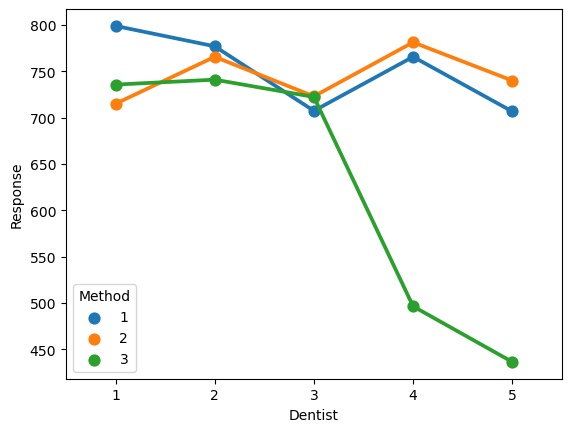

In [85]:
sns.pointplot(x='Dentist', y='Response', data=alloy1,hue='Method',errorbar=None)

In [86]:
formula='Response ~ C(Dentist):C(Method)'
model=ols(formula,alloy2).fit()
aov_table=anova_lm(model)
print(aov_table)

                        df         sum_sq       mean_sq         F    PR(>F)
C(Dentist):C(Method)  14.0  753898.133333  53849.866667  4.194953  0.000482
Residual              30.0  385104.666667  12836.822222       NaN       NaN


P-value is 0.000482 which is lesser than alpha i.e., 0.05. Hence, we have enough evidence toreject null hypothesis and consider there is significant difference in means among the Interaction effect between Dentist and Method levels in terms of implant hardness for Alloy 2.

<Axes: xlabel='Dentist', ylabel='Response'>

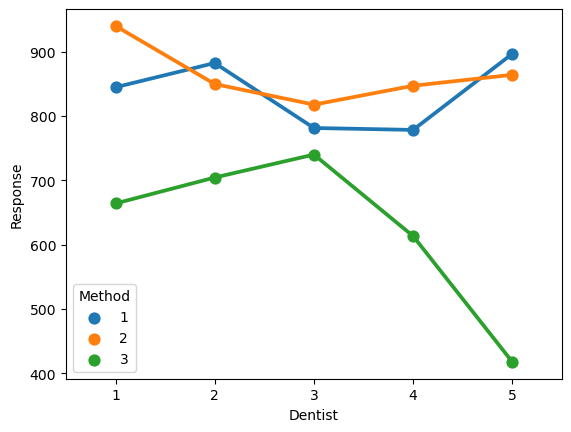

In [87]:
sns.pointplot(x='Dentist', y='Response', data=alloy2, hue='Method',errorbar=None)

### 4.4 How does the hardness of implants vary depending on dentists and methods together?

### Hypothesis Test alloy1
Null hypothesis :There is no difference among the factors Dentist andMethod levels in terms of implant hardness.

Alternative hypothesis:There is a difference among the factorsDentist and Method levels in terms of implant hardness

In [88]:
formula='Response ~ C(Dentist) + C(Method)'
model=ols(formula, alloy1).fit()
aov_table=anova_lm(model)
print(aov_table)

              df         sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  106683.688889  26670.922222  2.591255  0.051875
C(Method)    2.0  148472.177778  74236.088889  7.212522  0.002211
Residual    38.0  391121.377778  10292.667836       NaN       NaN


P value for Method is 0.0022 which is less than 0.05. Hence, we have enough evidence to reject null hypothesis and consider that at least one pair of Methodmeans is different for Alloy 1

### Hypothesis Test for Alloy 2
Null hypothesis (for Alloy 2):There is no difference among the factors Dentist and Method levels in terms of implant hardness for Alloy 2.

 Alternative hypothesis (for Alloy 2):There is a difference among the factors Dentist and Method levels in terms of implant hardness for Alloy 2.

In [89]:
formula='Response ~ C(Dentist) + C(Method)'
model=ols(formula, alloy2).fit()
aov_table=anova_lm(model)
print(aov_table)

              df         sum_sq        mean_sq          F    PR(>F)
C(Dentist)   4.0   56797.911111   14199.477778   0.926215  0.458933
C(Method)    2.0  499640.400000  249820.200000  16.295479  0.000008
Residual    38.0  582564.488889   15330.644444        NaN       NaN


P value for Method is 0.000008 which is less than 0.05. Hence, we have enough evidence to reject null hypothesis and consider that at least one pair of Methodmeans is different for Alloy 2

#### Calculate two-way anova  for interaction between dentist and method
**For alloy 1**

In [90]:
formula='Response ~ C(Dentist) + C(Method)+C(Dentist):C(Method)'
model=ols(formula, alloy1).fit()
aov_table=anova_lm(model)
print(aov_table)

                        df         sum_sq       mean_sq          F    PR(>F)
C(Dentist)             4.0  106683.688889  26670.922222   3.899638  0.011484
C(Method)              2.0  148472.177778  74236.088889  10.854287  0.000284
C(Dentist):C(Method)   8.0  185941.377778  23242.672222   3.398383  0.006793
Residual              30.0  205180.000000   6839.333333        NaN       NaN


P value for Dentist, Method, and Interaction variable (Dentist:Method) are all less than 0.05. Hence, we can conclude that to reject null hypothesis and considerthere is at least one pair of variables means are different for Alloy 1

#### Calculate two-way anova for interaction between dentist and method
**For alloy 2**

In [91]:
formula='Response ~ C(Dentist) + C(Method)+C(Dentist):C(Method)'
model=ols(formula, alloy2).fit()
aov_table=anova_lm(model)
print(aov_table)

                        df         sum_sq        mean_sq          F    PR(>F)
C(Dentist)             4.0   56797.911111   14199.477778   1.106152  0.371833
C(Method)              2.0  499640.400000  249820.200000  19.461218  0.000004
C(Dentist):C(Method)   8.0  197459.822222   24682.477778   1.922787  0.093234
Residual              30.0  385104.666667   12836.822222        NaN       NaN


P value for Method is 0.000004, which is only less than 0.05 when compared to Dentist (0.371833) and Interaction variable - Dentist : Method (0.093234). So we have enough evidence to reject null hypothesis stating that at least one of thepair means is different for Alloy 2